Given parametric equations are:
$x = \left( t\cos\theta \;-\; e^{M\lvert t\rvert}\,\sin(0.3t)\,\sin\theta \;+\; X \right)$

$y = \left( 42 + t\sin\theta \;+\; e^{M\lvert t\rvert}\,\sin(0.3t)\,\cos\theta \right)$

Unknowns are: $\theta, M, X$
Given range for unknown params is : 

$ \\
0 \deg<\theta<50 \deg \\
-0.05<M<0.05 \\
0<X<100\\
$

parameter t has range: $ 6<t<60 $

Inital try to fit the curve, with minimize and differential_evolution functions.

scipy.optimize.minimize: This algorithm deals with the Minimization of a scalar function of one or more variables. The BFGS algorithm is one of the most widely used second-order algorithms for numerical optimization, and it is frequently used to fit machine learning algorithms such as the logistic regression algorithm.

similarly as we have data points and variables to adjust to fit them like logistic regression, it is a good choice.

sources: 

https://www.geeksforgeeks.org/python/optimization-in-scipy/

https://www.geeksforgeeks.org/machine-learning/scipy-curve-fitting/

In [1]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd

In [2]:
data = pd.read_csv('xy_data.csv')

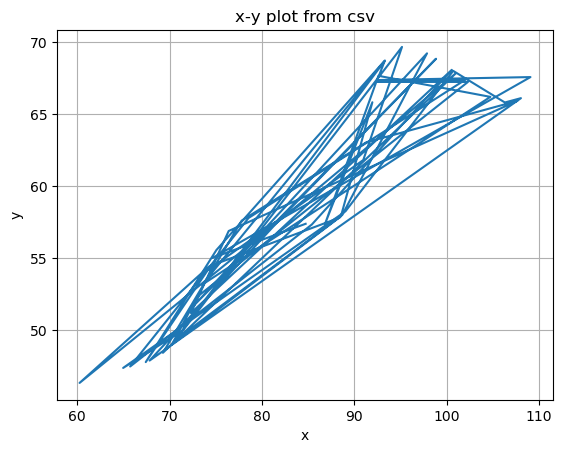

In [3]:
import matplotlib.pyplot as plt

plt.plot(data['x'][:50], data['y'][:50])
plt.xlabel('x')
plt.ylabel('y')
plt.title('x-y plot from csv')
plt.grid(True)

plt.show()

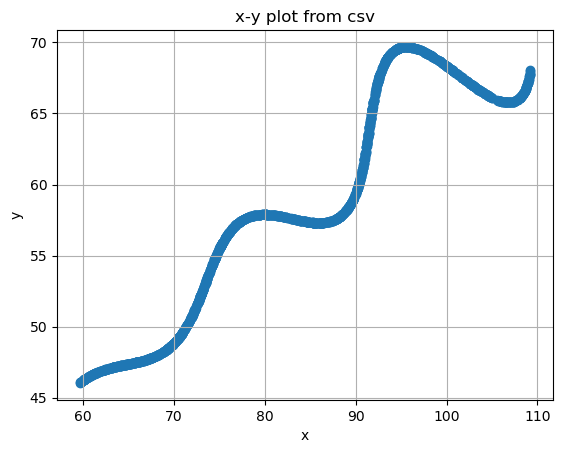

In [4]:
plt.scatter(data['x'], data['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('x-y plot from csv')
plt.grid(True)

plt.show()

In [5]:
# sorting the data points as the line plot shows the points are jumbled.
sorted_data = data.sort_values(by='x').reset_index(drop=True)

x_observed = sorted_data['x'].values
y_observed = sorted_data['y'].values
N = len(data)
t = np.linspace(6,60,N) # assuming the t value is spread evenly for calculating the data points (x, y).

In [6]:
def objective_function(params):
    theta_deg, M, X = params
    
    theta_rad = np.deg2rad(theta_deg)
    
    e_term = np.exp(M*np.abs(t))*np.sin(0.3*t)
    x_predicted = ( t * np.cos(theta_rad) - e_term * np.sin(theta_rad) + X )
    y_predicted = ( 42 + t * np.sin(theta_rad) - e_term * np.cos(theta_rad) )
    
    l1_error = np.sum(np.abs(x_observed-x_predicted)+np.abs(y_observed, y_predicted))
    return l1_error

In [7]:
bounds = [(0, 50), (-0.05, 0.05), (0, 100)]
initial_guess = [25,0,50]

result = minimize(objective_function, initial_guess, bounds=bounds)

if result.success:
    optimal_params = result.x
    print(f"Optimal Theta: {optimal_params[0]}")
    print(f"Optimal M: {optimal_params[1]}")
    print(f"Optimal X: {optimal_params[2]}")
else:
    print("Optimization failed.")

Optimal Theta: 30.43967609598402
Optimal M: 0.02941944916569193
Optimal X: 55.14747842305191


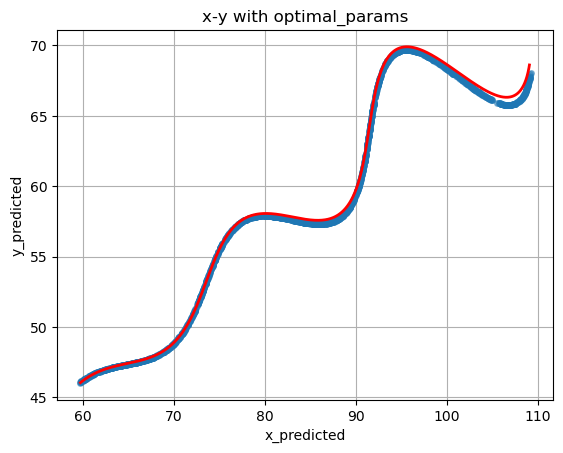

In [8]:
theta_deg, M, X = result.x
theta_rad = np.deg2rad(theta_deg)
t = np.linspace(6,60,N)

e_term = np.exp(M*np.abs(t))*np.sin(0.3*t)
x_predicted = ( t * np.cos(theta_rad) - e_term * np.sin(theta_rad) + X )
y_predicted = ( 42 + t * np.sin(theta_rad) + e_term * np.cos(theta_rad) )

plt.plot(x_observed, y_observed, 'o', label='Original Data', markersize=4, alpha=0.5)
plt.plot(x_predicted, y_predicted, 'r-', label='Fitted Curve', linewidth=2)
plt.xlabel('x_predicted')
plt.ylabel('y_predicted')
plt.title('x-y with optimal_params')
plt.grid(True)

plt.show()


using differential_evolution.

In [9]:
from scipy.optimize import differential_evolution

bounds = [(0, 50), (-0.05, 0.05), (0, 100)]

result = differential_evolution(objective_function, bounds)

if result.success:
    optimal_params = result.x
    print("--- Global Optimization Found Solution ---")
    print(f"Optimal Theta: {optimal_params[0]} degrees")
    print(f"Optimal M: {optimal_params[1]}")
    print(f"Optimal X: {optimal_params[2]}")

--- Global Optimization Found Solution ---
Optimal Theta: 30.028276360332036 degrees
Optimal M: 0.029261226076489767
Optimal X: 55.01103360097887


In [10]:
print(result)

             message: Optimization terminated successfully.
             success: True
                 fun: 87708.18946819624
                   x: [ 3.003e+01  2.926e-02  5.501e+01]
                 nit: 7
                nfev: 428
          population: [[ 3.018e+01  2.988e-02  5.478e+01]
                       [ 1.873e+00  2.155e-03  5.038e+01]
                       ...
                       [ 2.380e+01  2.247e-02  5.302e+01]
                       [ 2.805e+01 -2.096e-02  5.444e+01]]
 population_energies: [ 8.771e+04  9.029e+04 ...  8.876e+04  8.873e+04]
                 jac: [-3.457e+01  1.114e+02 -2.200e+01]


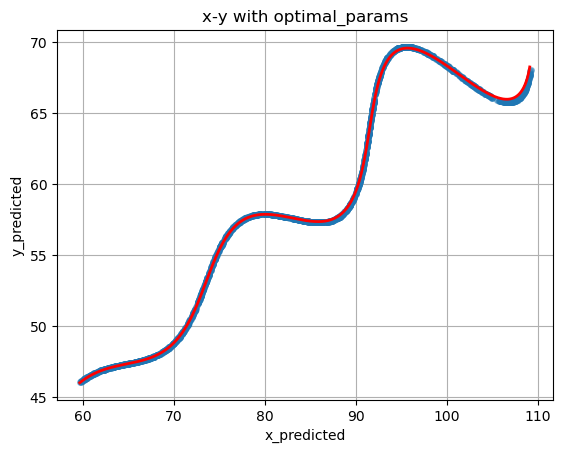

In [11]:
theta_deg, M, X = result.x
theta_rad = np.deg2rad(theta_deg)
t = np.linspace(6,60,N)

e_term = np.exp(M*np.abs(t))*np.sin(0.3*t)
x_predicted = ( t * np.cos(theta_rad) - e_term * np.sin(theta_rad) + X )
y_predicted = ( 42 + t * np.sin(theta_rad) + e_term * np.cos(theta_rad) )

plt.plot(x_observed, y_observed, 'o', label='Original Data', markersize=4, alpha=0.5)
plt.plot(x_predicted, y_predicted, 'r-', label='Fitted Curve', linewidth=2)
plt.xlabel('x_predicted')
plt.ylabel('y_predicted')
plt.title('x-y with optimal_params')
plt.grid(True)

plt.show()


rearranging the equations:

$x \;-\; X = \left( t\cos\theta \;-\; e^{M\lvert t\rvert}\,\sin(0.3t)\,\sin\theta  \right)$

$y \;-\; 42= \left( t\sin\theta \;+\; e^{M\lvert t\rvert}\,\sin(0.3t)\,\cos\theta \right)$

substituting: 

u(t) = t

v(t) = $ e^{M\lvert t\rvert}\,\sin(0.3t)\ $

we get:

$x \;-\; X = \left( u\cos\theta \;-\; v\sin\theta  \right)$

$y \;-\; 42= \left( u\sin\theta \;+\; v\cos\theta \right)$

these look like 2d rotation formulas
* $x - X = u \cdot \cos(\theta) - v \cdot \sin(\theta)$
* $y - 42 = u \cdot \sin(\theta) + v \cdot \cos(\theta)$

In matrix form:
$ \\
\begin{pmatrix} x-X \\ y-42 \end{pmatrix} = \begin{pmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{pmatrix} \begin{pmatrix} u \\ v \end{pmatrix}
$

now (x, y) plot is (u, v) that has been rotated and translated.

By unrotating the (x, y) data points to (u, v) curve, we get two new equations.

$
\begin{pmatrix} u \\ v \end{pmatrix} = \begin{pmatrix} \cos(\theta) & \sin(\theta) \\ -\sin(\theta) & \cos(\theta) \end{pmatrix} \begin{pmatrix} x-X \\ y-42 \end{pmatrix}
$

This gives us two new equations for each of your data points $(x_i, y_i)$:
* $u_i = (x_i - X) \cdot \cos(\theta) + (y_i - 42) \cdot \sin(\theta)$
* $v_i = -(x_i - X) \cdot \sin(\theta) + (y_i - 42) \cdot \cos(\theta)$

since $u_i = t_i$ and we know the range of $t_i$, from the above equation t is now dependent on $\theta\ and\ M$

the correct choice of $X$ and $\theta$, the $u_i$ value we calculate from the data is the parameter $t_i$ for that point!

Now we can build a much more stable and direct cost function for the optimizer. The goal is to find the $(\theta, M, X)$ that makes the "un-rotated" data fit the base curve equations.

Here is the logic for the cost function:

1.  **Input:** A guess for `params = [theta, M, X]`.
2.  **For each data point $(x_i, y_i)$:**
    * Calculate its "un-rotated" $u_i$ and $v_i$ using the guessed $\theta$ and $X$.
    * $u_i = (x_i - X)\cos(\theta) + (y_i - 42)\sin(\theta)$
    * $v_i = -(x_i - X)\sin(\theta) + (y_i - 42)\cos(\theta)$
3.  **Check Constraints:**
    * The problem states $6 < t < 60$.
    * Since we believe $u_i = t_i$, we must check if our calculated $u_i$ values are in this range.
    * If *any* $u_i$ is outside $[6, 60]$, this guess of $(\theta, X)$ is bad. We add a **large penalty** to the cost.
4.  **Calculate the Error:**
    * If the $u_i$ values are valid, we use the *other* base curve equation: $v(t) = e^{Mt}\sin(0.3t)$.
    * The "predicted" value for $v_i$ is: $v_{\text{predicted}_i} = e^{M \cdot u_i} \cdot \sin(0.3 \cdot u_i)$.
    * The error for this point is $(v_i - v_{\text{predicted}_i})^2$.
5.  **Output:** The total cost is the **sum of all squared errors** plus any **penalties**.

This will give the optimizer a better error to navigate, and it should find the global minimum very effectively.

In [12]:
def cost_function(params, x_data, y_data):

    theta_deg, M, X = params
    theta_rad = np.radians(theta_deg)

    c, s = np.cos(theta_rad), np.sin(theta_rad)

    x_prime = x_data - X
    y_prime = y_data - 42
    
    u = x_prime * c + y_prime * s
    v = -x_prime * s + y_prime * c
        
    v_predicted = np.exp(M * u) * np.sin(0.3 * u)
    error = np.sum((v - v_predicted)**2)
    
    t_min, t_max = 6.0, 60.0
    
    # Calculate squared distance from the valid range for any points outside it
    penalty_low = np.sum((u[u < t_min] - t_min)**2)
    penalty_high = np.sum((u[u > t_max] - t_max)**2)

    # penalty for u should be higher
    penalty = 10000 * (penalty_low + penalty_high)
    
    return error + penalty

In [13]:
result = differential_evolution(
    func=cost_function,
    bounds=bounds,
    args=(x_observed, y_observed)
)

if result.success:
    optimal_params = result.x
    print("--- Global Optimization Found Solution ---")
    print(f"Optimal Theta: {optimal_params[0]} degrees")
    print(f"Optimal M: {optimal_params[1]}")
    print(f"Optimal X: {optimal_params[2]}")

--- Global Optimization Found Solution ---
Optimal Theta: 29.999973004244843 degrees
Optimal M: 0.029999996957651053
Optimal X: 54.99999820421036


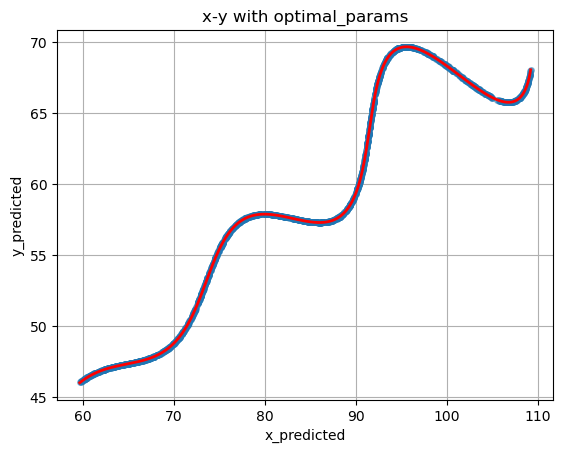

In [14]:
theta_deg, M, X = result.x
theta_rad = np.deg2rad(theta_deg)
t = np.linspace(6,60,N)

e_term = np.exp(M*np.abs(t))*np.sin(0.3*t)
x_predicted = ( t * np.cos(theta_rad) - e_term * np.sin(theta_rad) + X )
y_predicted = ( 42 + t * np.sin(theta_rad) + e_term * np.cos(theta_rad) )

plt.plot(x_observed, y_observed, 'o', label='Original Data', markersize=4, alpha=0.5)
plt.plot(x_predicted, y_predicted, 'r-', label='Fitted Curve', linewidth=2)
plt.xlabel('x_predicted')
plt.ylabel('y_predicted')
plt.title('x-y with optimal_params')
plt.grid(True)

plt.show()


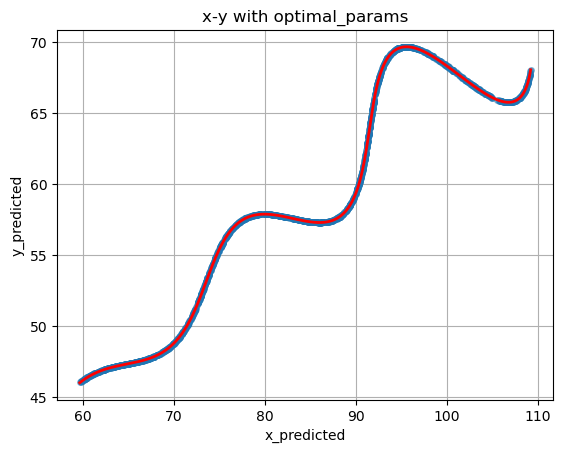

In [15]:
theta_deg, M, X = 30, 0.03, 55
theta_rad = np.deg2rad(theta_deg)
t = np.linspace(6,60,N)

e_term = np.exp(M*np.abs(t))*np.sin(0.3*t)
x_predicted = ( t * np.cos(theta_rad) - e_term * np.sin(theta_rad) + X )
y_predicted = ( 42 + t * np.sin(theta_rad) + e_term * np.cos(theta_rad) )

plt.plot(x_observed, y_observed, 'o', label='Original Data', markersize=4, alpha=0.5)
plt.plot(x_predicted, y_predicted, 'r-', label='Fitted Curve', linewidth=2)
plt.xlabel('x_predicted')
plt.ylabel('y_predicted')
plt.title('x-y with optimal_params')
plt.grid(True)

plt.show()


In [16]:
print(np.deg2rad(30))

0.5235987755982988
